In [1]:
# Assignment No: 3
    
# Mrunal Waghmare 
# BEAIML 43572
# Deep Learning Lab

# Build the Image classification model by dividing the model into following 4 stages:
# a. Loading and preprocessing the image data
# b. Defining the model’s architecture
# c. Training the model
# d. Estimating the model’s performance

In [11]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [13]:
# loading and processing image
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


In [14]:
X_train[0].min(), X_train[0].max()
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

In [15]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap("gray"))
    plt.title(f"Digit:{digit}")
    plt.xticks([])
    plt.yticks([])
    plt.figure(figsize=(16, 10))
    for i in range(20):
        plot_digit(X_train[i], y_train[i], plt, i)
    plt.show()
    X_train = X_train.reshape((X_train.shape + (1,)))
    X_test = X_test.reshape((X_test.shape + (1,)))
    y_train[0:20]

In [16]:
# Importing necessary libraries from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD  # Importing the SGD optimizer

# Defining model architecture with Input layer
model = Sequential([
    Input(shape=(28, 28, 1)),  # Defining the input shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Defining the optimizer
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compiling the model
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Displaying the model summary
model.summary()

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8646 - loss: 0.4466
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9765 - loss: 0.0784
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9852 - loss: 0.0507
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9906 - loss: 0.0326
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9926 - loss: 0.0245
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9935 - loss: 0.0193
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9960 - loss: 0.0145
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9975 - loss: 0.0097
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9987 - loss: 0.0062
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9993 - loss: 0.0040


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


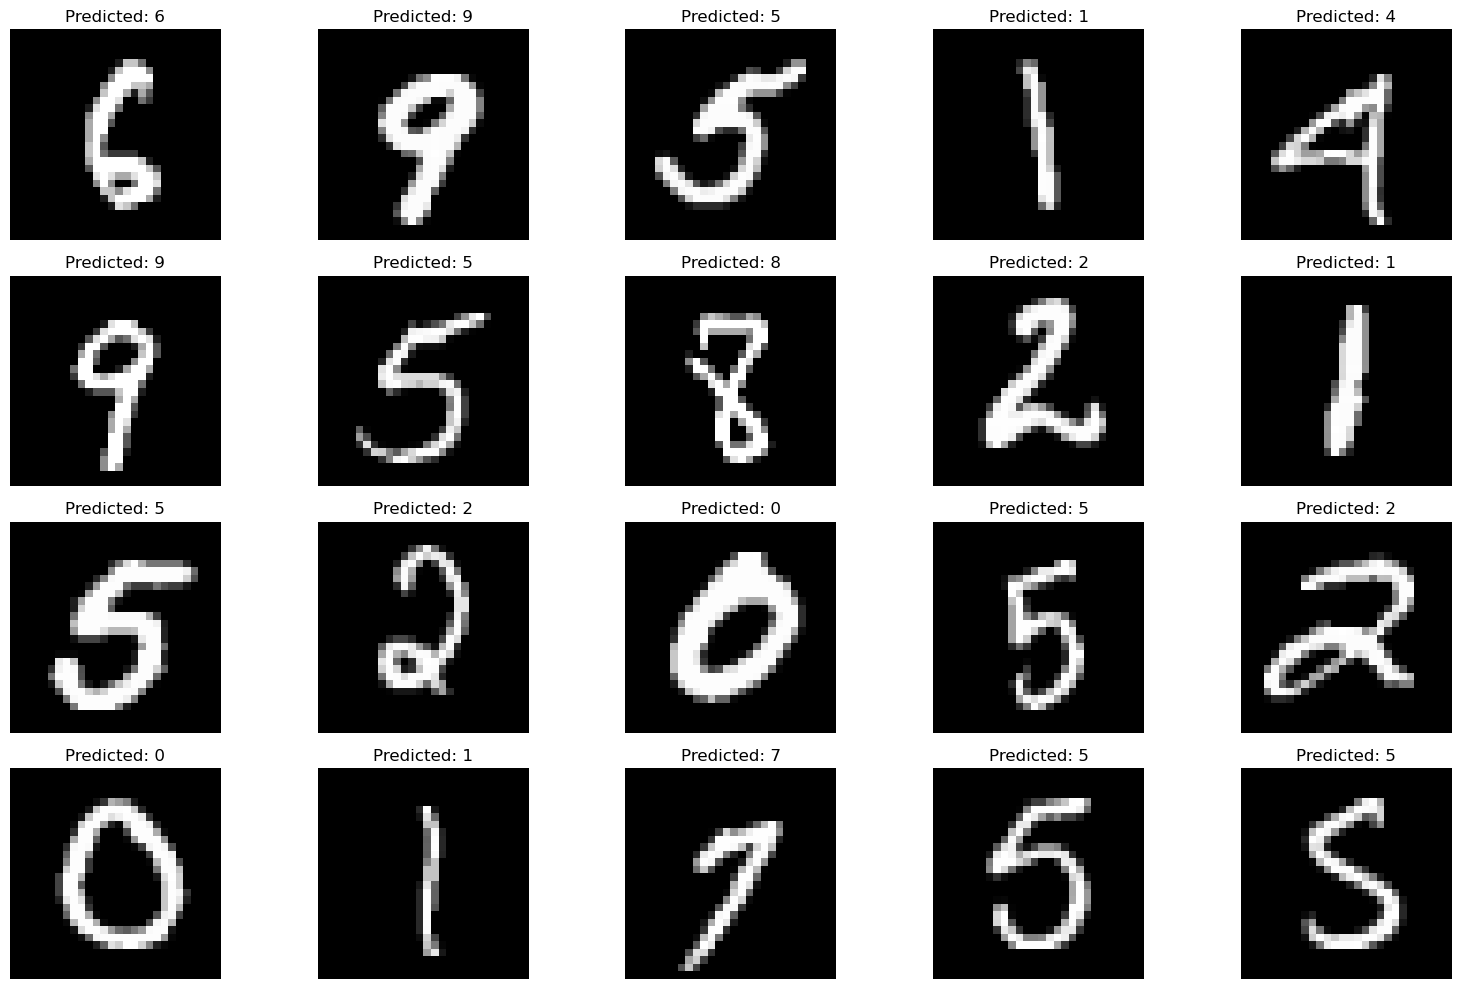

In [17]:
# import random
# import numpy as np
# import matplotlib.pyplot as plt

# Assuming `plot_digit` is a function you've defined to plot the image and its prediction
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)  # Arranging images in a 4x5 grid
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted: {digit}')
    plt.axis('off')

plt.figure(figsize=(16, 10))

# Plotting 20 images
for i in range(20):
    image = random.choice(X_test)  # Choose a random test image
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)  # Predict digit
    plot_digit(image.squeeze(), digit, plt, i)  # Remove squeeze() if `image` is already 2D

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy Score: 0.988


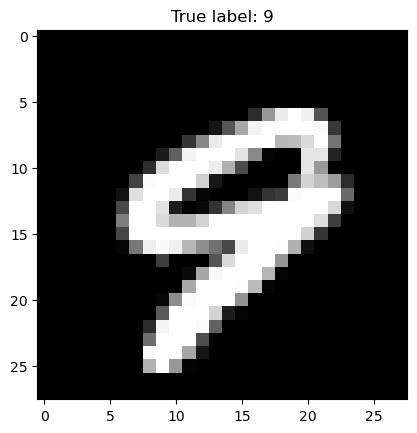

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Handwritten number in the image is = 9
Test loss: 0.040977392345666885
Test accuracy: 0.9879999756813049


In [20]:
# Check and reshape X_test if necessary
if X_test.ndim == 3:  # If X_test is (num_samples, 28, 28), reshape it
    X_test = X_test.reshape(-1, 28, 28, 1)

# Getting predictions for the test set
predictions = np.argmax(model.predict(X_test), axis=-1)

# Calculating accuracy
print("Accuracy Score:", accuracy_score(y_test, predictions))

# Displaying a random test image
n = random.randint(0, len(X_test) - 1)  # Ensuring the random index is within the test range
plt.imshow(X_test[n].reshape(28, 28), cmap='gray')  # Reshape back to 2D if necessary
plt.title(f"True label: {y_test[n]}")
plt.show()

# Displaying the predicted value for the selected image
predicted_value = model.predict(X_test)
print("Handwritten number in the image is = %d" % np.argmax(predicted_value[n]))

# Evaluating model performance
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])  # Test loss
print('Test accuracy:', score[1])  # Test accuracy


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9995 - loss: 0.0035 - val_accuracy: 0.9874 - val_loss: 0.0458
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9997 - loss: 0.0020 - val_accuracy: 0.9867 - val_loss: 0.0503
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9877 - val_loss: 0.0467
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9889 - val_loss: 0.0422
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 1.0000 - loss: 7.0868e-04 - val_accuracy: 0.9885 - val_loss: 0.0452
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 1.0000 - loss: 4.8987e-04 - val_accuracy: 0.9884 - val_loss: 0.0447
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 1.0000 - loss: 3.8440e-04 - val_accuracy: 0.9886 - val_loss: 0.0458
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 1.00

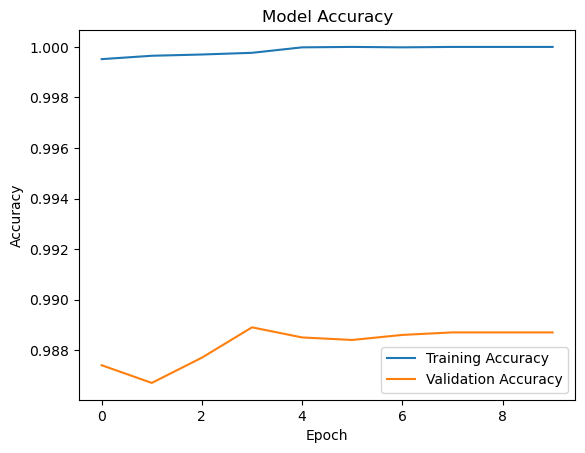

In [22]:
# Train the model and capture the training history
model_log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Plotting training and validation accuracy
plt.plot(model_log.history['accuracy'], label='Training Accuracy')
plt.plot(model_log.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
